In [ ]:
# https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/

In [14]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html
from scipy import optimize
def f(x):
    return (x**3 - 1)  # only one real root at x = 1

root = optimize.newton(p, 1.5, fprime=Dp, fprime2=lambda x: 6 * x - 2)
print(root)

1.465571231876768


In [76]:
import numpy as np
import matplotlib.pyplot as plt

### Sample Code >>>>>>>>>>>

In [1]:
from scalar import Scalar
from elementary_functions import *
import numpy as np
import matplotlib.pyplot as plt

def funct(values):
    var = Scalar(values, name='x')
    f = 2**var-2
    
    return f

val_1 = 1.0

f = funct(val_1)

print("Value, ", f.val, "; Derivative ", f.der, "; 2nd Derivative", f.der2)

Value,  0.0 ; Derivative  1.3862943611198906 ; 2nd Derivative 0.9609060278364028


In [54]:
# def funct(values):
#     var1 = Scalar(values[0], name='x')
#     var2 = Scalar(values[1], name='y')
#     f = (1.-var1)**2. + (var2-var1*var1)**2.
    
#     return f

# val_1 = 0.1
# val_2 = 0.2
# f = funct([val_1, val_2])

# print("Value, ", f.val, "; Derivative ", f.der, "; 2nd Derivative", f.der2)

In [2]:
# def f(xy):
#     x, y = xy
#     return (1.-x)**2. + (y-x*x)**2.

# # Gradient of Rosenbrock function
def df(xy):
    x, y = xy
    return np.array( [ -2.*(1.-x) - 4.*x*(y - x*x), 2.*(y - x*x) ])

# print("Value = ", f((val_1, val_2)), "; Derivative:", df((val_1, val_2)))

In [3]:
def vector_f(xy):
    x, y = xy
    var1 = Scalar(x, name='x')
    var2 = Scalar(y, name='y')
    f = (1.-var1)**2. + (var2-var1*var1)**2.
    return f

In [141]:
def hessian(f, x, dx=1e-5):
    '''
    Creates a function that computes the hessian matrix of a scalar field.
    '''
    if np.isscalar(x):
#         H = f(x).der2
#         return [[H]]
        x = float(x)
        return [[(f(x+dx).val - 2.*f(x).val + f(x-dx).val) / (4.*dx*dx)]]
    else:
        n = x.size
        hf = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                xll = np.array(x)
                xll[i] = xll[i] - dx
                xll[j] = xll[j] - dx
                xul = np.array(x)
                xul[i] = xul[i] - dx
                xul[j] = xul[j] + dx
                xlr = np.array(x)
                xlr[i] = xlr[i] + dx
                xlr[j] = xlr[j] - dx
                xur = np.array(x)
                xur[i] = xur[i] + dx
                xur[j] = xur[j] + dx
                hf[i, j] = (f(xur).val - f(xlr).val - f(xul).val + f(xll).val) / (4.*dx*dx)
        return hf
    
def Quasi_Newton(f, x0, h=0.1):
    ## DFP
    x = np.array(x0).ravel()
    H = hessian(f, x0)
    B = np.linalg.inv(H)
        
    # Updates x        
    dfx = f(x0).der # df(x0) #
    dx = - h * np.dot(B, dfx)
    xn = x + dx    
    
    # Updates B
    y = f(xn).der - dfx
    
    By = np.dot(B, y)
    dB = np.outer(dx, dx) / np.dot(y, dx) - np.outer(By, By) / np.dot(y, By)
    B += dB
  
    if np.isscalar(x0):
        return xn[0][0]
    else:
        return xn


def Newton(f, x0, h=0.1):
    
    x = np.array(x0).ravel()
    H = hessian(f, x0)#f(x0).der2
    B = np.linalg.pinv(H)
    
    # Updates x        
    dfx = f(x0).der # df(x0) #
    dx = - np.dot(B, dfx)
    
    xn = x + np.array(dx)   
    
    if np.isscalar(x0):
        return xn[0][0]
    else:
        return xn

In [17]:
def plot_opt(x_ls, f_=lambda x: 2**x-2):
    x_ls = np.array(x_ls)

    y = f_(x_ls)

    x_ = np.linspace(-1, 1, 250)
    z_ = f_(x_)

    plt.plot(x_ls, y, lw=3, alpha=0.5, label="Optimization")
    plt.plot(x_, z_, lw=3, ls="--", alpha = 0.5, label="Real")
    plt.legend()
    plt.show()

Result: [0.92219106 0.86244109] ; f(x) =  0.006198343919041583


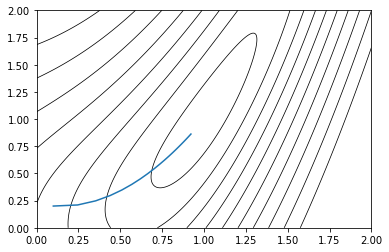

In [134]:
xn = np.array([0.1, 0.2])
x_ls = [xn]
for i in range(20):
    xn = Quasi_Newton(f=vector_f, x0=xn)    
    x_ls.append(xn)
    
print("Result:", xn, "; f(x) = ", vector_f(xn).val)

x = np.linspace(0., 2., 250)
y = np.linspace(0., 2., 250)
x, y = np.meshgrid(x, y)
z = (1-x)**2 + (y-x*x)**2
levels = np.exp(np.linspace(0., 2., 10)) - 0.9

x_ls = np.array(x_ls)
plt.plot(x_ls[:,0], x_ls[:,1])
plt.contour(x, y, z, levels, colors='k', linewidths=0.75)

plt.show()

Result: [1. 1.] ; f(x) =  0.0


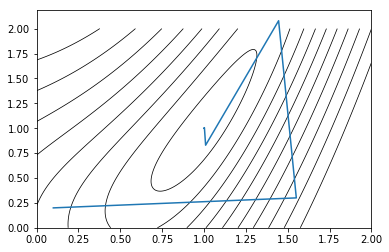

In [135]:
xn = np.array([0.1, 0.2])
x_ls = [xn]
for i in range(20):
    xn = Newton(f=vector_f, x0=xn)
    
    x_ls.append(xn)
    
print("Result:", xn, "; f(x) = ", vector_f(xn).val)

x_ls = np.array(x_ls)
plt.plot(x_ls[:,0], x_ls[:,1])
plt.contour(x, y, z, levels, colors='k', linewidths=0.75)

plt.show()

Result: -24.120222686826967 ; f(x) =  -1.9999999451610073


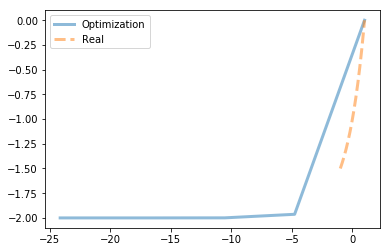

In [142]:
xn = val_1
x_ls = [xn]
for i in range(20):
    xn = Newton(f=funct, x0=xn)
    
    x_ls.append(xn)
    
print("Result:", xn, "; f(x) = ", funct(xn).val)

plot_opt(x_ls, f_=lambda x: 2**x-2)

Result: -10.5415314809248 ; f(x) =  -1.999329061329143


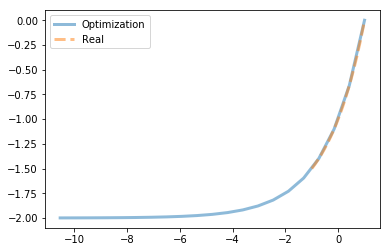

In [143]:
xn = val_1
x_ls = [xn]
for i in range(20):
    xn = Quasi_Newton(f=funct, x0=xn)
    # check quality
    if abs(xn/val_1) > 10**4:
        print("Not valid")
        break
    x_ls.append(xn)
    
print("Result:", xn, "; f(x) = ", funct(xn).val)


# https://searchcode.com/codesearch/view/11384372/
plot_opt(x_ls, f_=lambda x: 2**x-2)

In [13]:
## Newton Method find root
def newton(f, x0, epsilon=1e-5, max_iter=100):
    
    xn = x0
    hist = [xn]
    for n in range(0, max_iter):
        f_xn = f.val
        
        if abs(f_xn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn, hist
        Df_xn = f.der
        
        if Df_xn == 0:
            print('Zero derivative. No solution found.')
            return None
        
        xn -= f_xn/Df_xn
        hist.append(xn)
        f = funct(xn)
        
    print('Exceeded maximum iterations. No solution found.')
    return None


approx, hist = newton(funct(val_1), x0=val_1)

print(approx, funct(approx).val)
print(hist)

Found solution after 3 iterations.
1.4142156862745099 6.007304882871267e-06
[1.0, 1.5, 1.4166666666666667, 1.4142156862745099]
